In [1]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
r_cols = ["user id", "item id", "rating", "timestamp"]
ratings = pd.read_csv('../ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
u_cols = ["user id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv('../ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# merge movies and ratings
df = pd.merge(ratings, users, on="user id")
df.sort_values("user id").head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711


In [5]:
df["occupation"].describe()

count      100000
unique         21
top       student
freq        21957
Name: occupation, dtype: object

In [6]:
i_cols = ["item id", "movie title", "release date", "video release date", "IMDB URL", "unknown", "action", "adventure", "animation", "children's", "comedy", "crime", "documentary", "drama", "fantasy", "film-noir", "horror", "musical", "mystery", "romance", "sci-fi", "thriller", "war", "western"]
items = pd.read_csv('../ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')
items.head()

,item id,movie title,release date,video release date,IMDB URL,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
items.drop(['IMDB URL', 'release date', 'video release date'],axis=1, inplace=True)
items.head()

,item id,movie title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# merge movies and ratings
df = pd.merge(df, items, on="item id")
df.sort_values("user id").head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
30897,1,161,4,875072303,24,M,technician,85711,Top Gun (1986),0,...,0,0,0,0,0,1,0,0,0,0
30527,1,144,4,875073180,24,M,technician,85711,Die Hard (1988),0,...,0,0,0,0,0,0,0,1,0,0
82356,1,41,2,876892818,24,M,technician,85711,Billy Madison (1995),0,...,0,0,0,0,0,0,0,0,0,0
5247,1,13,5,875071805,24,M,technician,85711,Mighty Aphrodite (1995),0,...,0,0,0,0,0,0,0,0,0,0
24073,1,208,5,878542960,24,M,technician,85711,Young Frankenstein (1974),0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# One Hot Encoding
gender = pd.get_dummies(df["gender"])
occupation = pd.get_dummies(df["occupation"])

# gender.info()

In [10]:
# merge back to original df
df = pd.concat([df,gender,occupation], axis=1)

df.head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),0,...,0,0,0,0,0,0,0,0,0,1
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),0,...,0,0,0,1,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),0,...,0,0,0,0,1,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
# use drop to get features
data = df.drop(['gender', 'movie title', 'timestamp', 'occupation', 'zip code'],axis=1, inplace=True)
data = df.apply(pd.to_numeric) 

In [12]:
target = df["rating"]

In [13]:
# data.isna().sum()

In [14]:
data.drop(["rating"],axis=1, inplace=True)

In [15]:
# data = df[["userId", "movieId", "year", "genresVect"]]
data = data
feature_names = data.columns
data.head()

,user id,item id,age,unknown,action,adventure,animation,children's,comedy,crime,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,49,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,305,242,23,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,6,242,42,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,60,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,63,242,31,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.3556

In [18]:
importances = rf.feature_importances_
importances

array([2.33771046e-01, 3.04564332e-01, 1.81490110e-01, 6.24980091e-05,
       1.20130308e-02, 1.03495380e-02, 3.34052870e-03, 6.16203405e-03,
       1.17915164e-02, 1.00453838e-02, 1.58190110e-03, 1.02293258e-02,
       2.38714135e-03, 2.30474552e-03, 6.15816957e-03, 7.41118861e-03,
       7.47183659e-03, 1.87541890e-02, 1.23539767e-02, 1.63977214e-02,
       7.46453065e-03, 3.51339783e-03, 5.76510055e-03, 5.73708451e-03,
       9.15541587e-03, 4.60510544e-03, 1.76000413e-03, 8.20244848e-03,
       8.47463806e-03, 4.49066019e-03, 5.73769602e-03, 4.29248698e-03,
       1.04418445e-03, 3.47743842e-03, 7.10799369e-03, 4.70783012e-03,
       2.31359548e-03, 1.07534172e-02, 9.57167879e-03, 2.01776779e-03,
       2.46592516e-03, 4.49782691e-03, 1.12290636e-02, 5.88784788e-03,
       7.08664911e-03])

In [19]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3045643319841402, 'item id'),
 (0.23377104562410234, 'user id'),
 (0.18149010968083482, 'age'),
 (0.018754189031002757, 'romance'),
 (0.01639772138074196, 'thriller'),
 (0.01235397671550982, 'sci-fi'),
 (0.012013030752402261, 'action'),
 (0.011791516356399334, 'comedy'),
 (0.011229063617606505, 'student'),
 (0.010753417214069812, 'other'),
 (0.010349538047883805, 'adventure'),
 (0.010229325772218667, 'drama'),
 (0.010045383824143588, 'crime'),
 (0.009571678787104392, 'programmer'),
 (0.009155415869709948, 'administrator'),
 (0.008474638060050282, 'engineer'),
 (0.008202448480763949, 'educator'),
 (0.00747183658572918, 'mystery'),
 (0.00746453064525712, 'war'),
 (0.0074111886134916, 'musical'),
 (0.0071079936896812565, 'librarian'),
 (0.007086649107770748, 'writer'),
 (0.006162034046959007, "children's"),
 (0.006158169570661593, 'horror'),
 (0.005887847883858415, 'technician'),
 (0.005765100551125542, 'F'),
 (0.005737696016272839, 'executive'),
 (0.005737084506661086, 'M'),
 (0.0047

No handles with labels found to put in legend.


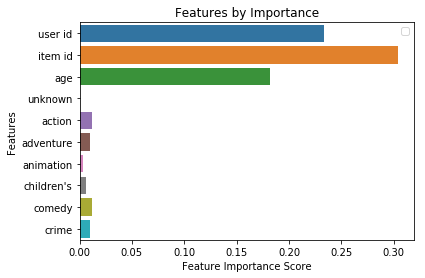

In [20]:
sns.barplot(x=importances[0:10], y=feature_names[0:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.show()